A notebook related to [https://github.com/kazunori279/TensorFlow-for-absolute-beginners/blob/master/2.%20Classify%20Manhattan%20with%20TensorFlow.ipynb](https://github.com/kazunori279/TensorFlow-for-absolute-beginners/blob/master/2.%20Classify%20Manhattan%20with%20TensorFlow.ipynb)

In [1]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
columns = ['LONGITUDE', 'LATITUDE', 'BOROUGH']
data = pd.read_csv('../data/NYPD_Motor_Vehicle_Collisions.zip', compression='zip', usecols=columns)

In [5]:
data

,BOROUGH,LATITUDE,LONGITUDE
0,BROOKLYN,40.693490,-73.979170
1,MANHATTAN,40.752117,-73.977684
2,QUEENS,40.703700,-73.903240
3,NaN,40.513985,-74.235500
4,NaN,40.717236,-73.960530
5,NaN,40.528133,-74.216606
6,NaN,40.671925,-73.881190
7,NaN,40.604313,-74.052080
8,BROOKLYN,40.659275,-73.889000
9,QUEENS,40.728344,-73.735466


In [6]:
len(data[data['LONGITUDE'] == 0.0])

72

In [7]:
data.drop(data[data['LONGITUDE'] == 0.0].index, inplace=True)
data.drop(data[data['LATITUDE'] == 0.0].index, inplace=True)
data.drop(data[data['BOROUGH'] == 'BRONX'].index, inplace=True)
len(data)

1021737

In [8]:
data['is_manhattan'] = data['BOROUGH'] == 'MANHATTAN'
data.drop('BOROUGH', axis=1, inplace=True)
data.dropna(inplace=True)

In [9]:
data

,LATITUDE,LONGITUDE,is_manhattan
0,40.693490,-73.979170,False
1,40.752117,-73.977684,True
2,40.703700,-73.903240,False
3,40.513985,-74.235500,False
4,40.717236,-73.960530,False
5,40.528133,-74.216606,False
6,40.671925,-73.881190,False
7,40.604313,-74.052080,False
8,40.659275,-73.889000,False
9,40.728344,-73.735466,False


In [10]:
from sklearn.utils import shuffle
shuffle(data)

,LATITUDE,LONGITUDE,is_manhattan
574378,40.707676,-73.923852,False
285688,40.760153,-73.998794,True
649488,40.752913,-73.906075,False
630295,40.665656,-73.815171,False
371647,40.701923,-73.912162,False
881410,40.733921,-73.992794,True
654472,40.687506,-73.914644,False
499207,40.675146,-73.981325,False
974835,40.689160,-73.801973,False
154678,40.774807,-73.984420,True


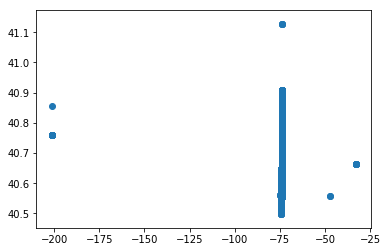

In [11]:
plt.scatter(data['LONGITUDE'], data['LATITUDE']);

In [12]:
data[data['LATITUDE'] == data['LATITUDE'].max()]

,LATITUDE,LONGITUDE,is_manhattan
46140,41.12615,-73.71353,False
46393,41.12615,-73.71353,False
46568,41.12615,-73.71353,False
48774,41.12615,-73.71353,False
